<a href="https://colab.research.google.com/github/giuseppedeluca1996/ProgettoNLP-RAG_System/blob/master/Progetto_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Argument Generation



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 0;
            background: linear-gradient(to bottom, #f0f8ff, #e6f7ff);
            color: #333;
        }
        .container {
            max-width: 1200px;
            margin: 40px auto;
            padding: 20px;
            background: #ffffff;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
            border-radius: 12px;
        }
        h1, h2 {
            text-align: center;
            color: #007acc;
            margin-bottom: 20px;
        }
        h1 {
            font-size: 2.5em;
        }
        p {
            line-height: 1.8;
            font-size: 1.2em;
        }
        .highlight {
            color: #ff6347;
            font-weight: bold;
        }
        .section {
            padding: 20px 0;
            border-bottom: 1px solid #f0f0f0;
        }
        .section:last-child {
            border-bottom: none;
        }
        .icon {
            display: inline-block;
            margin-right: 10px;
            font-size: 1.5em;
            color: #007acc;
            vertical-align: middle;
        }
        ul {
            padding-left: 20px;
        }
        ul li {
            margin-bottom: 10px;
        }
        .gif-container {
            text-align: center;
            margin: 20px 0;
        }
        img {
            width: 100%;
            max-width: 800px;
            border-radius: 10px;
        }
        .footer {
            text-align: center;
            padding: 10px;
            background: #007acc;
            color: white;
            font-size: 0.9em;
            border-radius: 0 0 12px 12px;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="section">
            <h2><span class="icon">💡</span><b>Introduzione</b></h2>
            <p>
                Il <span class="highlight">Retrieval-Augmented Generation (RAG)</span> combina la potenza dei modelli di linguaggio di ultima generazione (<span class="highlight">LLM</span>) con un sistema di recupero documentale per generare risposte precise e contestualizzate.
                Questo approccio supera i limiti tradizionali degli LLM, come l'obsolescenza delle informazioni o l'incompletezza delle risposte, utilizzando documenti rilevanti come supporto.
            </p>
        </div>
        <div class="section">
            <h3><span class="icon">🔍</span><b>Come funziona</b></h3>
            <p>
                Il processo inizia con il preprocessamento di un set di documenti, convertiti in rappresentazioni numeriche (<span class="highlight">vettori</span>) grazie a un <span class="highlight">modello di embedding</span>.
                Questi vettori vengono indicizzati in un <span class="highlight">database vettoriale</span> ottimizzato per ricerche rapide.
            </p>
            <ul>
                <li>La query dell'utente viene anch'essa trasformata in un embedding.</li>
                <li>Attraverso una <span class="highlight">ricerca di similarità</span>, i vettori della query vengono confrontati con i vettori indicizzati.</li>
                <li>I documenti rilevanti vengono recuperati e uniti alla query per creare un <span class="highlight">prompt arricchito</span>.</li>
                <li>Il prompt arricchito viene utilizzato dal modello di linguaggio per generare risposte dettagliate e contestualizzate.</li>
            </ul>
        </div>
        <div class="section">
            <h3><span class="icon">📊</span><b>Applicazioni</b></h3>
            <p>
                Grazie alla combinazione tra ricerca documentale e generazione del linguaggio, il RAG è ideale per:
            </p>
            <ul>
                <li>Chatbot avanzati e assistenti virtuali.</li>
                <li>Sistemi di supporto tecnico.</li>
                <li>Automazione della conoscenza.</li>
            </ul>
        </div>
    </div>
</body>
</html>

<h3><span class="icon">🎥</span><b>Visualizzazione del Processo</b></h3>

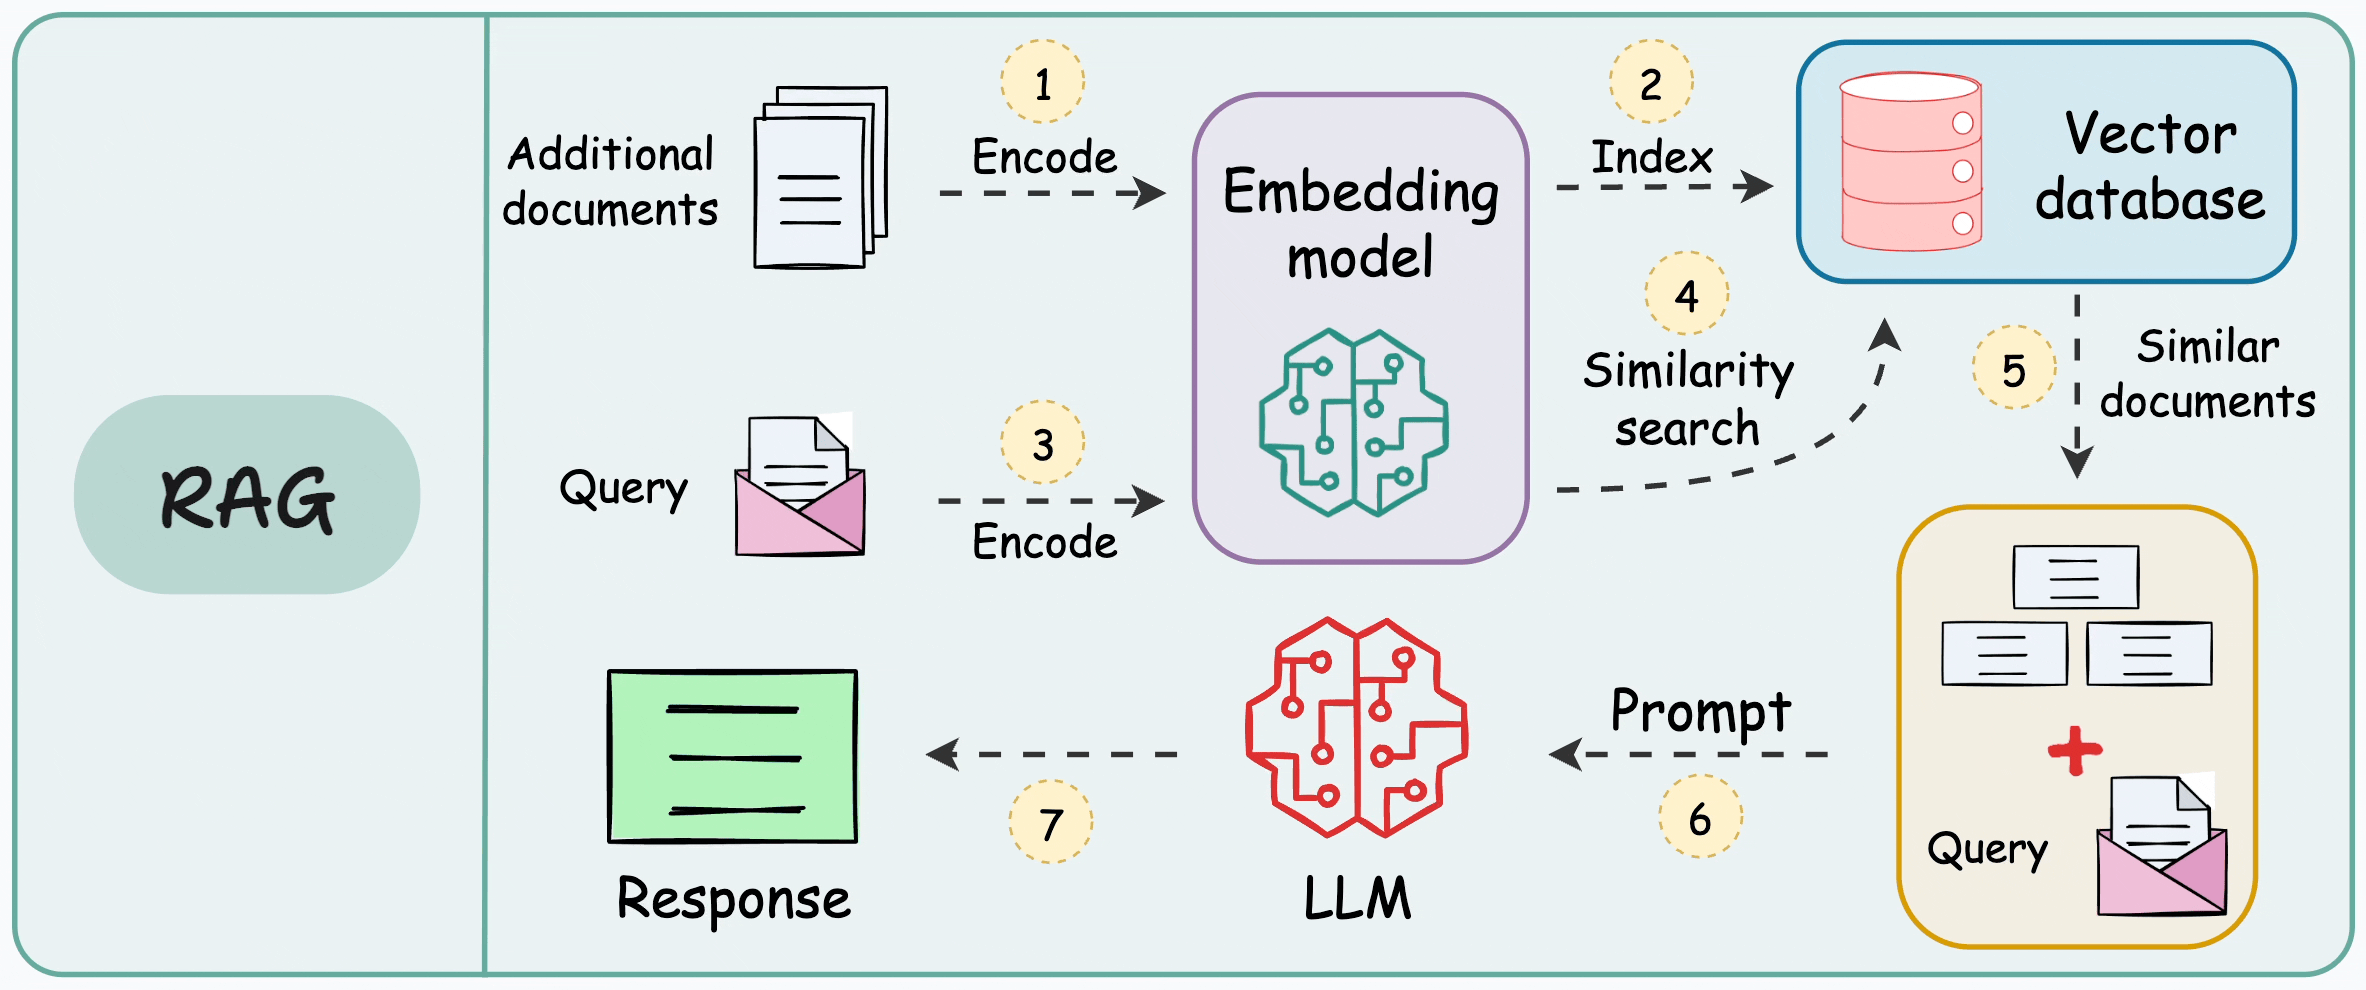

# Fase 0: Settaggio dipendenze, variabili d'ambiente e definizione funzioni di utilità

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Initial setup...
!rm -rf sample_data/

#Install Dependencies
!pip install python-dotenv==0.21.0
!pip install datasets==2.19.1
!pip install langchain==0.3.9
!pip install langchain-core==0.3.21
!pip install langchain_community==0.3.8
!pip install langchain-huggingface==0.1.2
!pip install sentence-transformers==3.3.1
!pip install chromadb==0.5.20
!pip install wget

## Install NeMo
BRANCH = 'r2.0.0'
#!wget https://github.com/state-spaces/mamba/releases/download/v2.2.2/mamba_ssm-2.2.2+cu118torch2.1cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
#!pip install mamba_ssm-2.2.2+cu118torch2.1cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
!pip install "/content/drive/MyDrive/Colab Notebooks/mamba_ssm-2.2.2+cu118torch2.1cxx11abiFALSE-cp310-cp310-linux_x86_64.whl"
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.3.1 which is incompatible.
   ━━━━━━━━

In [ ]:
#Import Dependencies

## General
import json
import hashlib
import chromadb
import torch

## Colab
from google.colab import userdata

## LangChain
from langchain_community.llms import HuggingFaceHub
from langchain_core.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import LLMChain
from datasets import load_dataset
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

##NeMo
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder
from nemo.collections.tts.models import FastPitchModel

## Other
from IPython.display import Audio
import soundfile as sf
import IPython.display as ipd
from IPython.display import display, HTML
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [ ]:
## Setting Enviroment Variable

## Get device info
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

## HuggingFace
huggingfacehub_api_token = userdata.get('huggingface_apitoken')

## LLM Model
##Change this variables to use different llm model
llm_model_repo = "tiiuae/falcon-7b-instruct"
llm_model_temperature = 0.6
llm_model_max_new_tokens = 500

## Embeddings Model
##Change this variables to use different embeddings model
embeddings_model_repo = "sentence-transformers/all-MiniLM-L6-v2"
embedding_function = SentenceTransformerEmbeddings(model_name=embeddings_model_repo, model_kwargs={'device': device})

## Dataset
##Change this variables to use different dataset
dataset_repo = "izumi-lab/wikipedia-en-20230720"
dataset_version = None
dataset_split = "train[0:1]"
dataset_article_id = "currid"
dataset_article_text = "text"

## Chunk policy
##Change this variables to use different chunks policy\
chunk_size = 512
chunk_overlap = 0
chunk_separetors = [" ", ",", "\n", "."]
#chunk_file = '/content/drive/MyDrive/Colab Notebooks/chunks.json'
chunk_file = 'chunks.json'

## Chroma Database
#chromadb_directory = "/content/drive/MyDrive/Colab Notebooks/.chroma"
chromadb_directory = ".chroma"
chroma_num_max_similar_documents_search = 3
chroma_collections_name = "document_chunks"

## NeMo Model
nemo_fastpitch_model_repo = 'tts_en_fastpitch'
nemo_vocoder_model_repo = 'tts_en_hifigan'
nemo_sample_rate = 22050
output_audio_file_name = "output_audio.wav"

[NeMo W 2024-12-20 09:41:02 nemo_logging:349] <ipython-input-6-fa6c87720611>:21: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
      embedding_function = SentenceTransformerEmbeddings(model_name=embeddings_model_repo, model_kwargs={'device': device})
    
[NeMo W 2024-12-20 09:41:05 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
    The secret `HF_TOKEN` does not exist in your Colab secrets.
    To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
    You will be abl

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
## Define utils function

def generate_text_hash(text):
    return hashlib.md5(text.encode('utf-8')).hexdigest()

def get_existing_hashes(documents):
    return [doc['metadata']['id'] for doc in documents]

def document_encoder(document):
    """
    Funzione per serializzare un documento con metadati e testo in formato JSON.
    """
    return {
        'page_content': document.page_content,  # Campo text del documento
        'metadata': document.metadata  # Campo metadata del documento
    }

def batch(iterable, batch_size=30000):
  length = len(iterable)
  for idx in range(0, length, batch_size):
      yield iterable[idx:min(idx + batch_size, length)]

# Fase 1: Generazione base di conoscenza

Questa fase del progetto gestisce un flusso di lavoro per l'elaborazione di documenti di testo, utilizzando **Chroma** come **database vettoriale** e **Hugging Face** per il caricamento del **dataset**.

L'obiettivo è trasformare i documenti di testo in **chunks** (piccole porzioni di testo) e memorizzarli in Chroma, dove vengono **indicizzati** tramite **embeddings**, ossia rappresentazioni numeriche dei testi che permettono ricerche semantiche anziché basarsi solo sulla corrispondenza letterale.

A supporto della realizzazione del sistema RAG è stato usato il framework **LangChain** che aiuta e semplifica la realizzazione di questo genere di sistemi.




---

I dataset vengono recuperati da [Hugging Face](https://huggingface.co/datasets). I campi che definiscono il dataset da elaborare sono:

*   **Repo**: Identificativo univoco del dataset presente sul portale
*   **Split**: Scelta del set di dati da usare del dataset
*   **Version**: Scelta della versione (se presenti più versioni) del dataset da usare
*   **Article Text**: Tag identificativo del testo puro presente nel dataset da utilizzare
*   **Article Id: Tag** identificativo dell'id presente nel dataset da utilizzare

---

Il processo inizia con il caricamento del dataset di testo, che viene poi suddiviso in chunks tramite la classe **RecursiveCharacterTextSplitter**.
LangChain supporta diversi metodi per suddividere il testo in chunk, alcuni specifici per la tipologia di testo da elaborare ([Text Splitters](https://python.langchain.com/docs/concepts/text_splitters/)).

Ci sono 3 approcci che possono essere principalmente utilizzati:
1.   **Approaches Length-based:** approcci che mirano a suddividere il testo basandosi sulla lunghezza del testo (in parole o caratteri)
2.   **Approaches Text-structured based:**  approcci che mirano a suddividere il testo basandosi sulla naturale suddivisione del testo in paragafri, capitoli ecc..
3.   **Approaches Document-structured based:** approcci che mirano a suddividere il testo strutturato in particolari formati come Json, Html, Marckdown ecc..











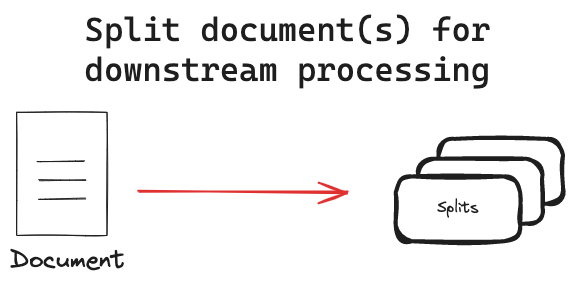

In questo caso RecursiveCharacterTextSplitter esegue suddivisioni che mantengono il flusso del linguaggio naturale, mantengono la coerenza semantica all'interno della scissione e si adattano a diversi livelli di granularità del testo.

RecursiveCharacterTextSplitter tenta di mantenere intatte le unità più grandi (ad es. Paragrafi). Se un'unità supera la dimensione del pezzo, passa al livello successivo (ad es. Frasi). Questo processo continua fino al livello delle parole, se necessario.

Ogni chunk viene identificato univocamente attraverso un hash, che ne garantisce l'unicità e impedisce l'elaborazione ripetuta.

I chunks già processati vengono conservati in un file JSON, che tiene traccia degli identificatori univoci (hash) per evitare duplicati ed elaborazioni inutili ad ogni esecuzione.



---


I modelli di embbeddings vengono recuperati da [Hugging Face](https://huggingface.co/models). I campi che definiscono il modello da utilizzare sono:

*   **Repo**: Identificativo univoco del dataset presente sul portale

---

Per ogni nuovo chunk, viene calcolato un embedding, ovvero una rappresentazione numerica del testo, utilizzando una funzione di embedding specificata.

LangChain supporta diversi modelli per la realizzazione degli embeddings, direttamente tramite proprie classi o ricavati da Hugging Face, molti già allenati su specifici task [Embeddings Model](https://python.langchain.com/docs/concepts/embedding_models/).

Gli embeddings permettono di comparare semanticalmente i documenti, rendendo possibile una ricerca basata sul significato piuttosto che sulla semplice corrispondenza di parole. Questo può avvenire grazie alle caratteristiche dei database vettoriali che permettono di eseguire la ricerca dei vettori (embeddings dei documenti) simili ad un vettore dato (embedding della query sottoposta).
Questo flusso di lavoro garantisce una gestione efficiente dei documenti e una ricerca semantica avanzata, in cui il sistema può restituire i documenti più pertinenti rispetto a una query, basandosi sul loro significato.

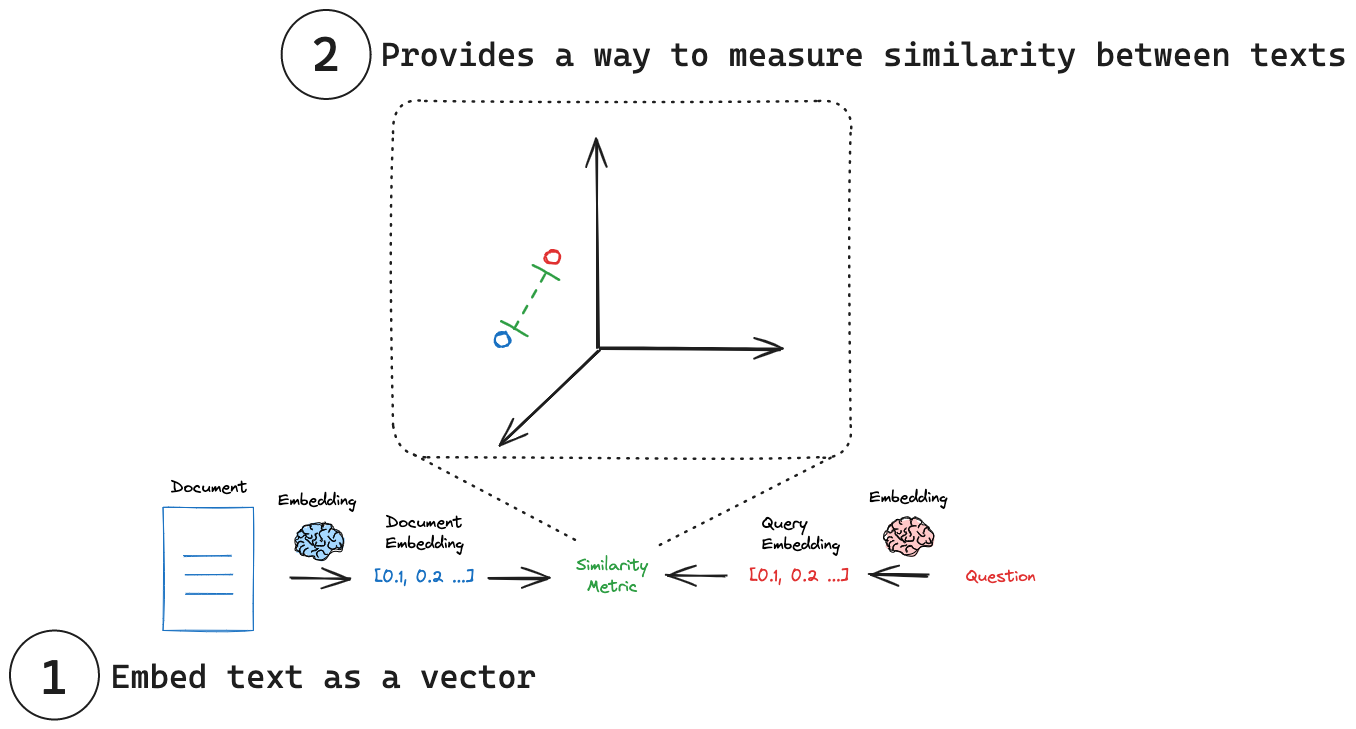

In particolare, si è scelto di utilizzare il modello *"sentence-transformers/all-MiniLM-L6-v2"* che bene si adatta al task da ricoprire in questo progetto.

Questo modello è adatto per codificare query e documenti, quindi trovare i documenti più rilevanti per una determinata query calcolando la somiglianza del coseno tra la query e le incorporazioni dei documenti.





Il database vettoriale utilizzato è Chroma per via della facile integrazione mediante il framework Langchain.

I chunks vengono elaborati in modalità batch, per ottimizzare le prestazioni, e salvati nel database con i rispettivi embeddings.

In [ ]:
## Load dataset from HuggingFace
dataset = load_dataset(path=dataset_repo,split=dataset_split)

## Set up Chroma vector database client
persistent_client = chromadb.PersistentClient(path=chromadb_directory)
collection = persistent_client.get_or_create_collection(chroma_collections_name)

chroma_client = Chroma(
    client=persistent_client,
    collection_name=collection.name,
    embedding_function=embedding_function
)

## Extract from dataset only text document part
articles = dataset[dataset_article_text]

## Create chunks from text
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap, separators=chunk_separetors
)
chunks = text_splitter.create_documents(articles)

## Set for all chunks create a unique identifier based on text hash
for chunk in chunks:
      text_hash = generate_text_hash(chunk.page_content)
      chunk.metadata['id'] = text_hash


## Save all chunks into json file. This file is used to check id chunks is new or not to avoid insert if are already present
try:
    with open(chunk_file, 'rb') as f:
        json_bytes = f.read()
        json_str = json_bytes.decode('utf-8')
        existing_chunks = json.loads(json_str)
except FileNotFoundError:
    existing_chunks = []

## Gets a set of unique hashes already present in the chunks in the file
existing_hashes = set(get_existing_hashes(existing_chunks))
print(len(existing_hashes))

## Filter only new chunks
new_chunks = [doc for doc in chunks if doc.metadata['id'] not in existing_hashes]
print(len(new_chunks))

## Add only new chunks to file
if new_chunks:
    with open(chunk_file, 'wb') as f:
        json_data = json.dumps(obj=(existing_chunks+new_chunks),separators=(',', ':'),sort_keys=False, default=document_encoder, indent=4).encode('utf-8')
        f.write(json_data)

## Calculate and store embeddings of new chunks into Chroma
if len(new_chunks) > 0 :
  for chunk_batch in batch(chunks, batch_size=3000):
    chroma_client.add_documents(documents=chunk_batch)

Resolving data files:   0%|          | 0/33 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/6650632 [00:00<?, ? examples/s]

[NeMo W 2024-12-20 09:46:08 nemo_logging:349] <ipython-input-8-8f22b3878698>:8: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
      chroma_client = Chroma(
    


2083067
0


# Fase 2: Settaggio del modello LLM e configurazione del prompt

Questa fase del progetto è dedicata alla definizione di un prompo LLM e la configurazione del modello LLM da utilizzare nella generazione di una risposta alla domanda sottoposta.

Il template sarà formato dalla nostra **domanda** e da un **contesto** che aiuterà il modello LLM a generare una risposta corretta.

Il contesto sarà formato da un numero a nostra scelta di documenti presenti nella base di conoscenza che siano affini alla domanda posta.


---

I modelli LLM vengono recuperati da [Hugging Face](https://huggingface.co/models):

*   **Repo**: Identificativo univoco del modello presente sul portale
*   **Temperature**: Una misura della creatività che il modello può usare nel generare una risposta
*   **Max new tokens**: Numero di parole massimo per formare la risposta

---

In [ ]:
## Define Prompt LLM template
template = """I am your assistant Ai, I am here to help you answer your question. To answer the question asked I will use a recovered context of my knowledge base:
{context}
Based on the provided information, please answer the following question: {question}
Answer:"""

prompt_llm = PromptTemplate.from_template(template)

## Set up HuggingFaceHub model
llm = HuggingFaceHub(huggingfacehub_api_token=huggingfacehub_api_token,
                         repo_id=llm_model_repo,
                         model_kwargs={"temperature": llm_model_temperature,
                                       "max_new_tokens": llm_model_max_new_tokens})

[NeMo W 2024-12-20 09:47:57 nemo_logging:349] <ipython-input-9-357c0e7e40a3>:10: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
      llm = HuggingFaceHub(huggingfacehub_api_token=huggingfacehub_api_token,
    


# Fase 3: Ricerca degli embeddings affini alla query sottoposta al modello

In questa fase si gestisce la ricerca e la risposta basata su una query dell'utente, utilizzando il database vettoriale Chroma e un modello di linguaggio (LLM).




Il processo inizia con la richiesta di una query da parte dell'utente, che viene poi utilizzata per eseguire una ricerca semantica nel database Chroma.

La funzione di ricerca confronta l'embeddings, generato a partire dalla query, con gli embeddings dei documenti memorizzati nel database, restituendo i documenti più simili in base al loro significato, non alla corrispondenza esatta delle parole.



Nello specifico si gestisce la ricerca e la risposta basata su una query dell'utente, utilizzando il database vettoriale Chroma e un modello di linguaggio (LLM). Il processo inizia con la richiesta di una query da parte dell'utente, che viene poi utilizzata per eseguire una ricerca semantica nel database Chroma. La funzione similarity_search confronta la query con gli embeddings dei documenti memorizzati nel database, restituendo i documenti più simili in base al loro significato, non alla corrispondenza esatta delle parole.

Una volta ottenuti i risultati della ricerca, il codice costruisce un contesto che contiene i documenti più pertinenti, formattandoli in un formato leggibile. Questo contesto, insieme alla query dell'utente, viene inviato al modello di linguaggio (definito dalla variabile llm). Il modello genera una risposta alla domanda dell'utente, utilizzando il contesto fornito. La risposta viene quindi stampata.

Questo flusso consente di rispondere alle query dell'utente utilizzando sia i dati memorizzati nel database che la capacità del modello di linguaggio di comprendere e generare risposte basate sul significato dei documenti.

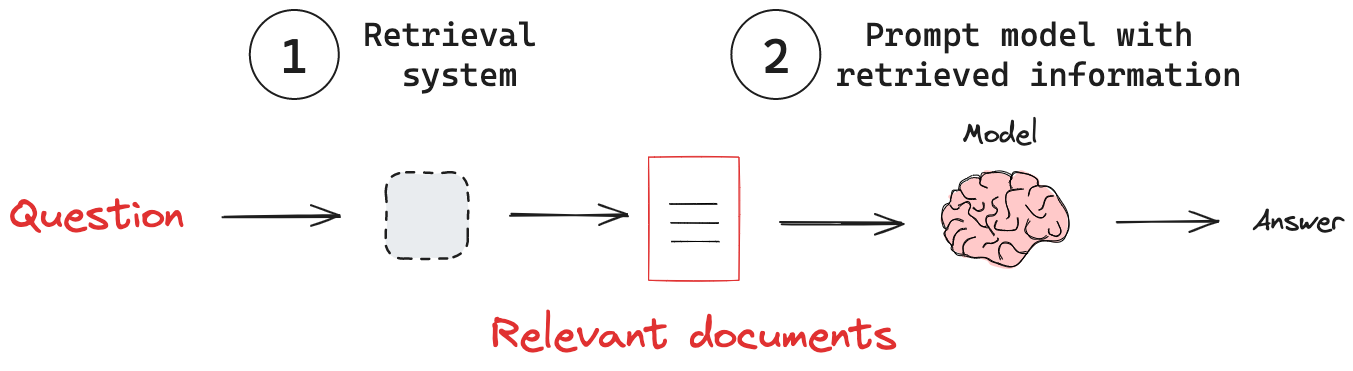

Viene poi estratta solo la parte rilevante della risposta, il codice cerca la stringa ***Answer:*** nel testo generato dal modello, isolando così la risposta vera e propria e ignorando eventuali introduzioni o preamboli.

Verrà poi sfruttato un modello Text To Speech per leggere ad alta voce la risposta!

In [ ]:
## Get a user query
query = input("Enter your query: ")

if query:

  ## Perform similarity search
  results = chroma_client.similarity_search(query, k=chroma_num_max_similar_documents_search)

  ## Set context based on query results into template llm

  context = ""
  for i, doc in enumerate(results):
      # Add a separator or some kind of formatting to distinguish the documents
      context += f"\nDocument {i + 1}: {doc.page_content}\n\r"

  # Run the query through the language model
  response_chain = LLMChain(llm=llm, prompt=prompt_llm)
  response = response_chain.run({"context": context, "question": query})
  print(response)

  # Extraxt only answer from llm model response
  position = str(response).find("Answer:")
  if position != -1:
      answer = str(response)[position+len("Answer:")+1:]
      print(f"\n{answer}")

Enter your query: What is eiffel tower? 


[NeMo W 2024-12-20 09:51:19 nemo_logging:349] <ipython-input-10-2431de3547b1>:17: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
      response_chain = LLMChain(llm=llm, prompt=prompt_llm)
    
[NeMo W 2024-12-20 09:51:19 nemo_logging:349] <ipython-input-10-2431de3547b1>:18: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
      response = response_chain.run({"context": context, "question": query})
    


I am your assistant Ai, I am here to help you answer your question. To answer the question asked I will use a recovered context of my knowledge base:

Document 1: the second, making the entire ascent a 600 step climb. Although there is a staircase to the top level, it is usually accessible only by lift. On this top, third level is a private apartment built for Gustave Eiffel's private use. He decorated it with furniture by Jean Lachaise and invited friends such as Thomas Edison.
History.
Origin.
The design of the Eiffel Tower is attributed to Maurice Koechlin and Émile Nouguier, two senior engineers working for the Compagnie des Établissements Eiffel. It was

Document 2: the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
The tower has three levels for visitors, with restaurants on the first and second levels. The top level's upper platform is above the ground – the highest observation deck accessible to the public in the European Union. T

# Fase 4: Generazione risposta audio dal testo prodotto (Text To Speech)

Nell'ultima parte di progetto ci focalizziamo sul processo TTS, generando un file audio a partire da un testo, utilizzando modelli pre-addestrati messi a disposizione dal framework di Nvidia **NeMo** per la sintesi vocale.


---

I modelli necessari a realizzare il processo TTS vengono recuperati da [Nvidia NeMo AI Models](https://catalog.ngc.nvidia.com/models):

*   Repo: Identificativo univoco del modello fastpitch accettati da NeMo
*   Vocoder: Identificativo univoco del modello Vocoder accettati da NeMo

---

Il processo Text To Speech prevede l'implementazione di una pipeline che comprende diversi step per poter ottenere l'audio da riprodurre da un testo.

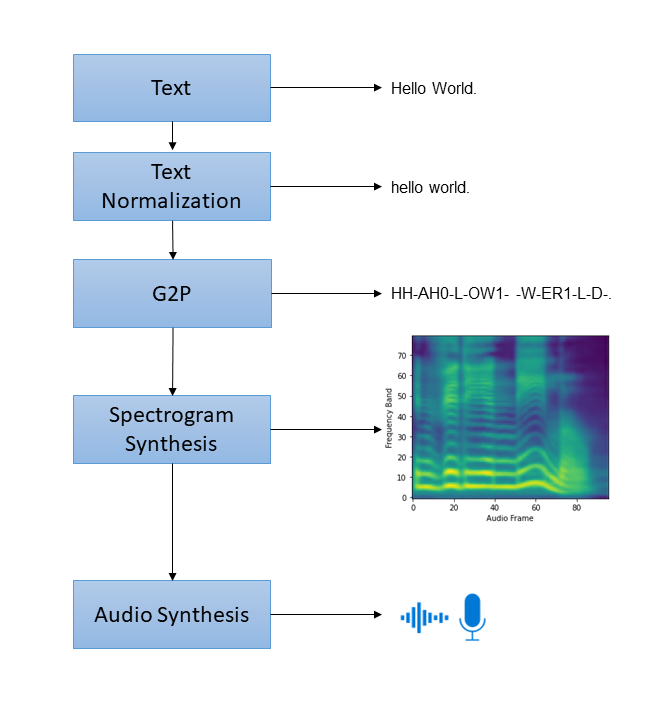


Il processo inizia caricando due modelli: il modello che genera uno spettrogramma a partire dal testo, e il Vocoder, che converte lo spettrogramma in audio.

Entrambi i modelli vengono caricati sulla GPU per ottimizzare i calcoli.

1. **Text Normalization:** Convertire il testo, in testo parlato. Ad esempio, il diminutivo Mr. viene sostituito da Mister ecc..
2. **Grapheme to Phoneme conversion (G2P):** Convertire le unità base del testo in unità base del testo parlato ovvero i fonemi. Questo passo è necessario per tutte quelle lingue che sono fonetiche, ovvero parole assumono una pronuncia diversa a seconda della posizione e del significato. <font color="red">[Omesso in questa fase]</font>

3. **Spectrogram Synthesis:** Convertire i fonemi in uno spettogramma.
4. **Audio Synthesis:** Convertire uno spettogramma in audio.

Dopo questa conversione, il codice esegue il processo di "spostamento" dei dati dalla GPU alla CPU e li converte in array NumPy, per poi salvare l'audio come file (ad esempio in formato WAV) con una frequenza di campionamento predefinita.

Esistono diversi modelli per la realizzazione di uno spettogramma e di un Vocoder.

In particolare, per la generazione di uno spettogramma è stato utilizzato il modello **FastPitch**. Questo modello è tra quelli più attuali per questa tipologia di task. Il modello è basato su quanto introdotto da Google nel suo modello FastSpeech migliorandone le performance grazie ad una completa parallelizzione del processamento.



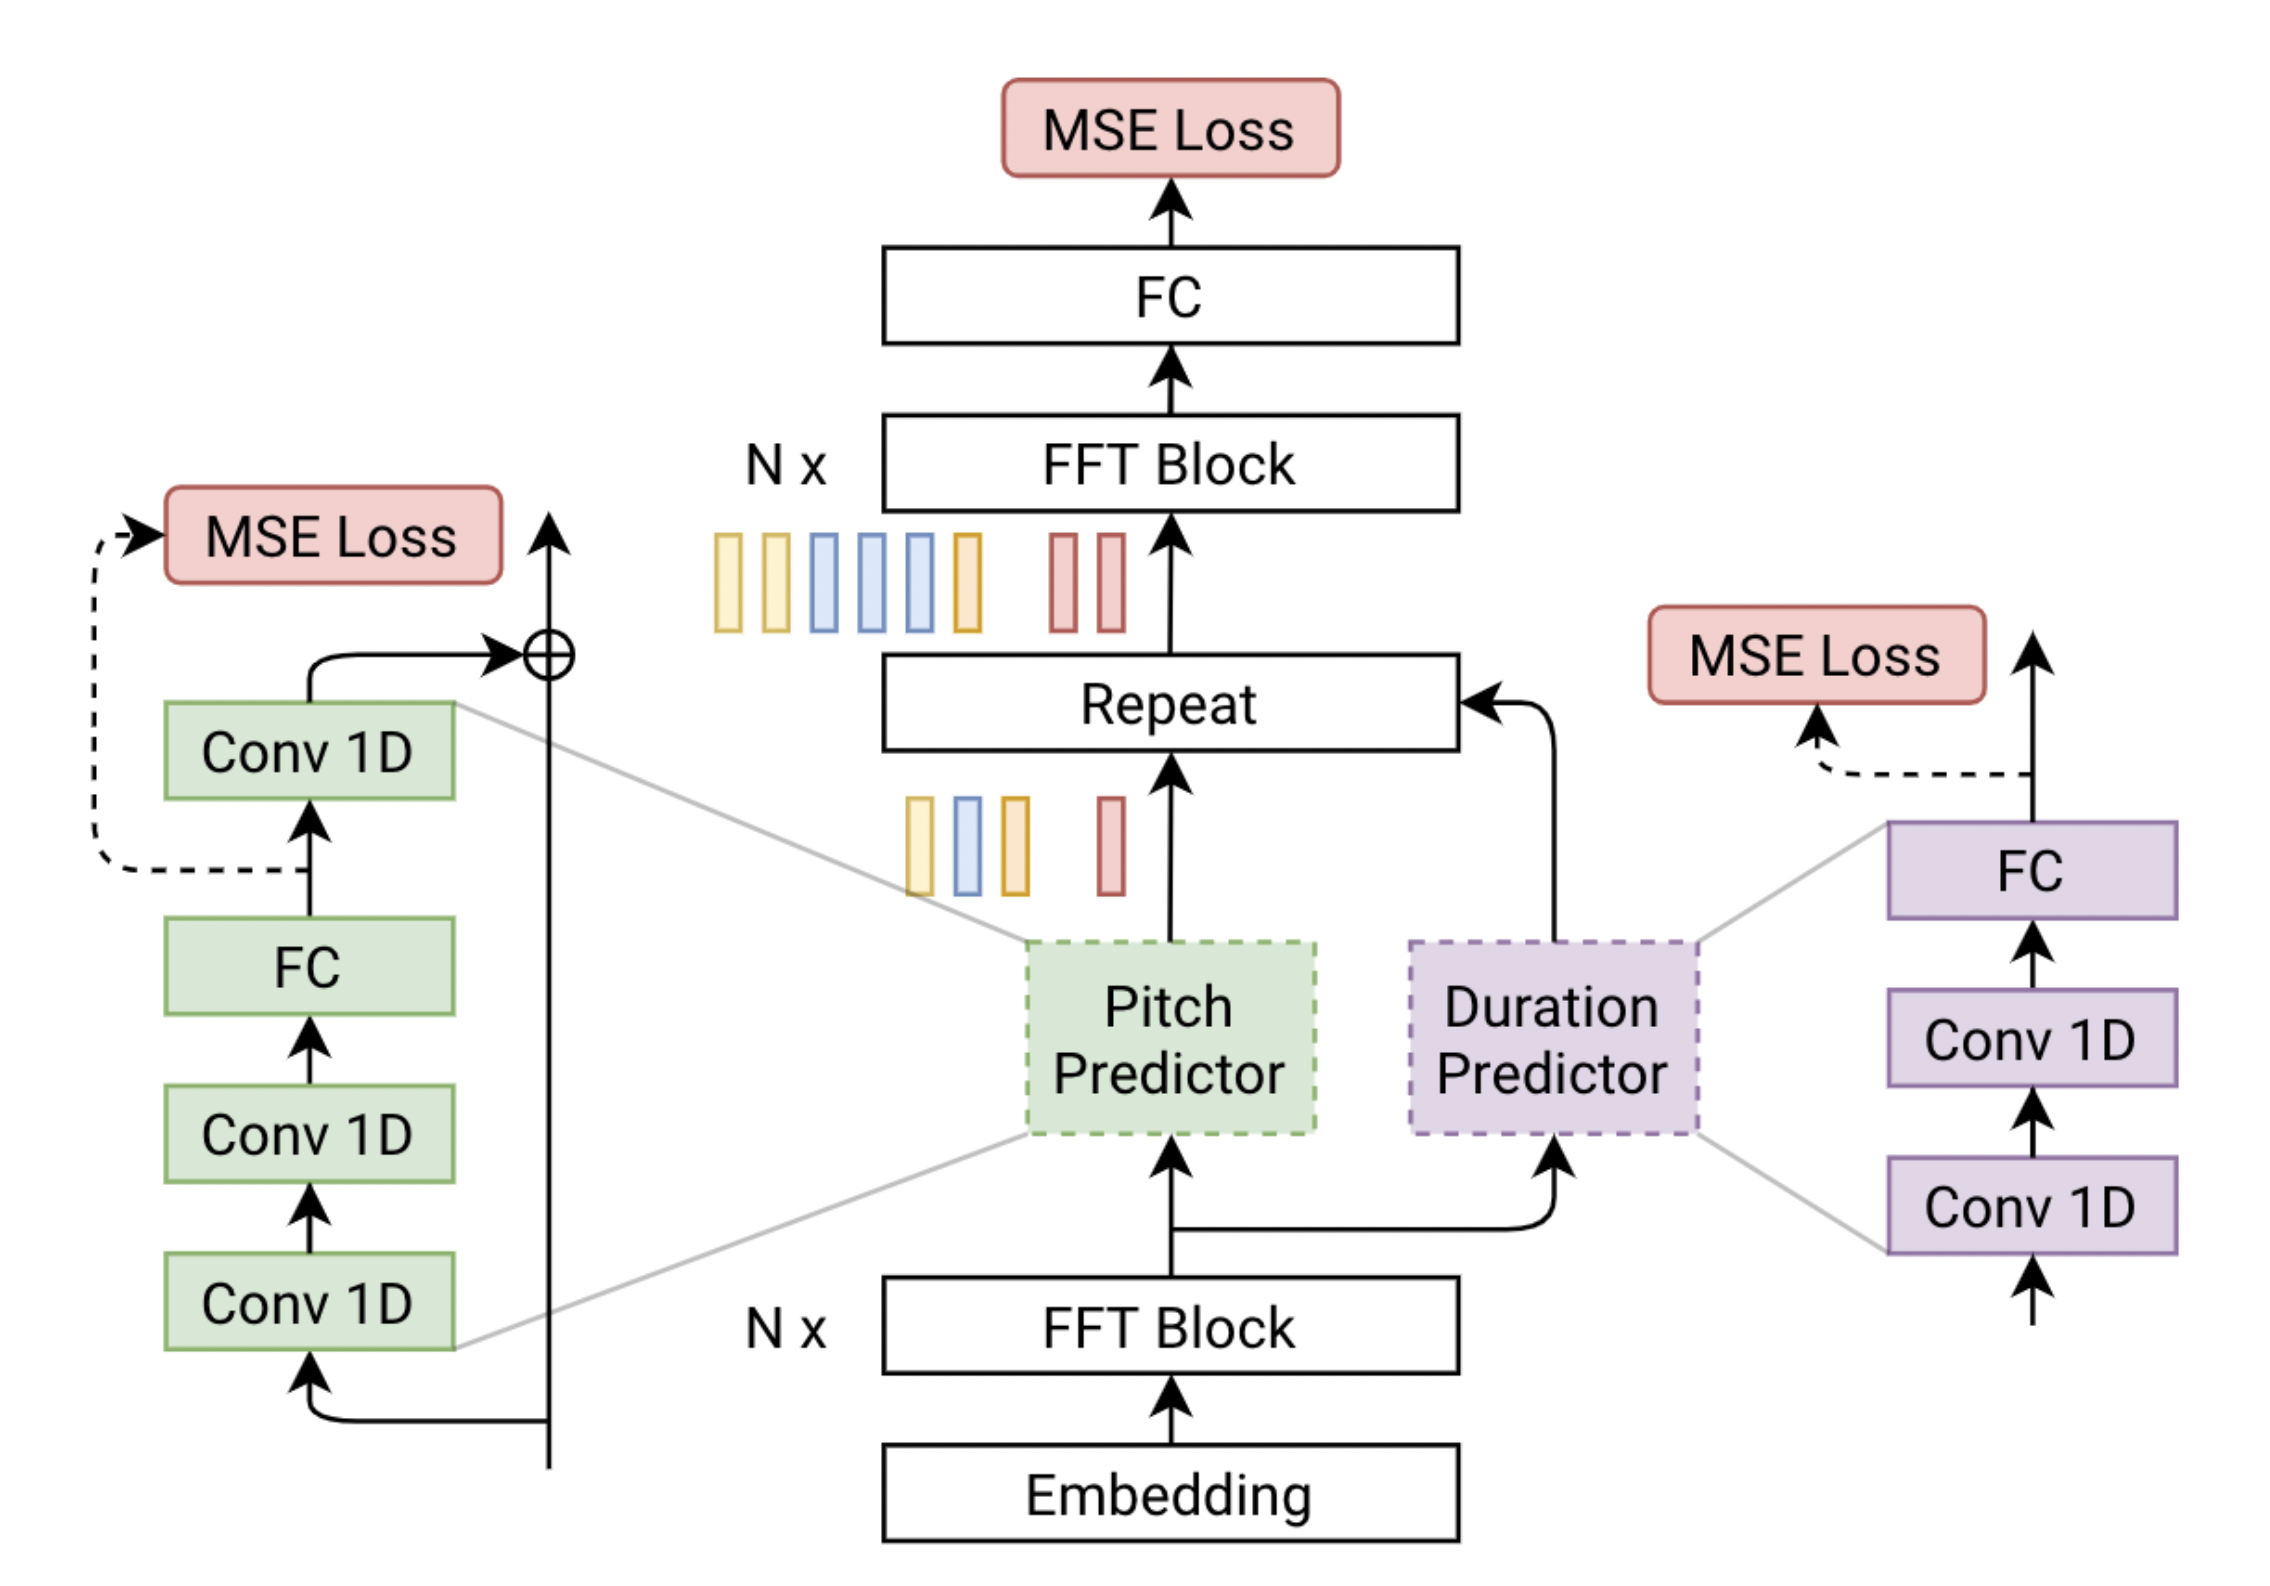

Per la generazione dell'audio a partira da uno spettogramma è stato utilizzato il modello **HiFiGAN**.


[NeMo I 2024-12-20 09:51:41 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_2.0.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2024-12-20 09:51:43 common:826] Instantiating model from pre-trained checkpoint


 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars.
INFO:NeMo-text-processing:Creating ClassifyFst grammars.
[NeMo W 2024-12-20 09:52:26 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2024-12-20 09:52:26 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
  

[NeMo I 2024-12-20 09:52:26 features:305] PADDING: 1


[NeMo W 2024-12-20 09:52:26 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/nemo/core/connectors/save_restore_connector.py:682: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

[NeMo I 2024-12-20 09:52:26 save_restore_connector:275] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.0.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2024-12-20 09:52:26 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_2.0.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2024-12-20 09:52:29 common:826] Instantiating model from pre-trained checkpoint


[NeMo W 2024-12-20 09:52:34 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2024-12-20 09:52:34 modelPT:183] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2024-12-20 09:52:34 features:305] PADDING: 0


[NeMo W 2024-12-20 09:52:34 features:282] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2024-12-20 09:52:34 features:305] PADDING: 0


[NeMo W 2024-12-20 09:52:34 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
      WeightNorm.apply(module, name, dim)
    


[NeMo I 2024-12-20 09:52:35 save_restore_connector:275] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.0.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


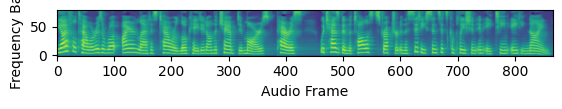

In [ ]:
## Setting NeMo TTS

## Load our spectrogram and vocoder models onto our device
spectrogram_model = FastPitchModel.from_pretrained(nemo_fastpitch_model_repo).eval().to(device)
vocoder = Vocoder.from_pretrained(nemo_vocoder_model_repo).eval().to(device)

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(answer, normalize=True)

# Generate spectrogram from text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output from pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

# Save audio file
sf.write(output_audio_file_name, audio, nemo_sample_rate)

# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()

# Definisci il tuo array NumPy audio e la frequenza di campionamento
audio = Audio(filename=output_audio_file_name, rate=nemo_sample_rate, autoplay=True)

# Mostra il widget audio
display(audio)

# Codice HTML per l'autoplay
display(HTML(f"""
    <script>
        var audio = document.querySelector('audio');
        if (audio) {{
            audio.autoplay = true;
            audio.play();
        }}
    </script>
"""))